In [6]:
from data_augment import GaussianNoise, HundredHzNoise
import torch
from dataloader import dataloader
import numpy as np

X_train, y_train, X_test, y_test = dataloader(1)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

freq_augm = HundredHzNoise(X_train).to(device)
print(freq_augm.relative_scale)
gaus_augm = GaussianNoise(sd=freq_augm.noise_sd).to(device)

tensor([0.1011, 0.1196, 0.1103, 0.1057, 0.1098, 0.1184, 0.1648, 0.1311, 0.1186,
        0.1127, 0.1144, 0.1253, 0.1537, 0.1324, 0.1210, 0.1173, 0.1180, 0.1270,
        0.1263, 0.1221, 0.1245, 0.1296])


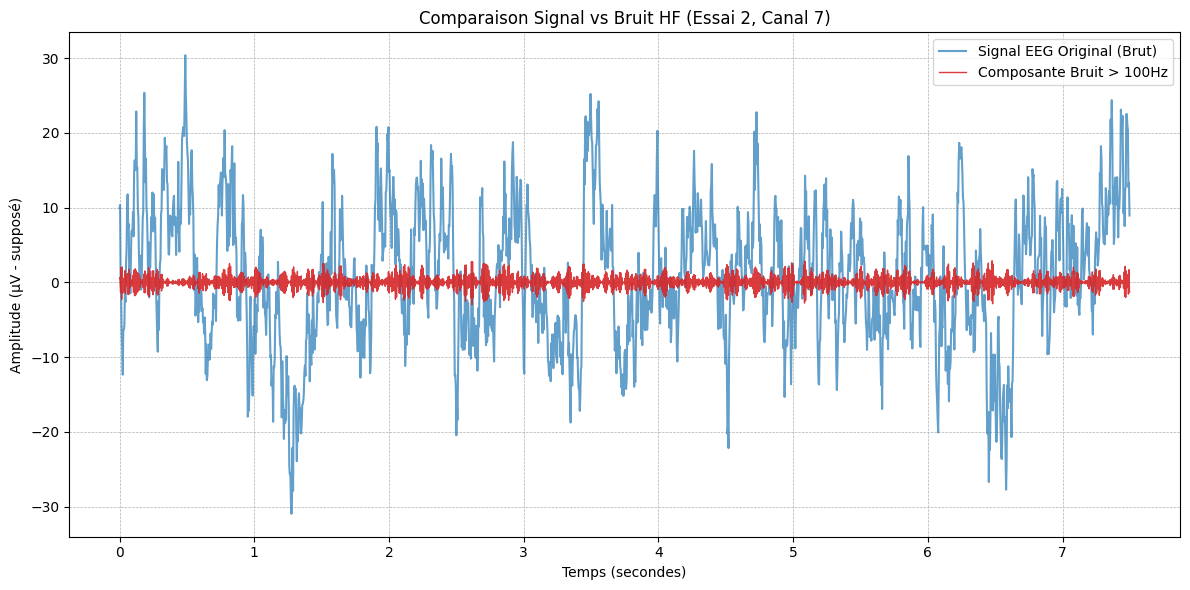

In [7]:
import matplotlib.pyplot as plt
fs = 250
cutoff = 100
trial_idx = 2
channel_idx = 7
original_signal = X_train[trial_idx, channel_idx, :]
noise_signal = freq_augm.noise_bank[trial_idx, channel_idx, :].cpu()

n_times = len(original_signal)
time_axis = np.arange(n_times) / fs

plt.figure(figsize=(12, 6))

# Plot 1 : Le signal original complet
# Alpha=0.7 pour le rendre légèrement transparent
plt.plot(time_axis, original_signal, label='Signal EEG Original (Brut)', 
         color='#1f77b4', linewidth=1.5, alpha=0.7)

# Plot 2 : Le bruit >100Hz extrait
# En rouge vif, légèrement plus fin pour voir les détails
plt.plot(time_axis, noise_signal, label=f'Composante Bruit > {cutoff}Hz', 
         color='#d62728', linewidth=1, alpha=0.9)

# Décoration
plt.title(f"Comparaison Signal vs Bruit HF (Essai {trial_idx}, Canal {channel_idx})")
plt.xlabel("Temps (secondes)")
plt.ylabel("Amplitude (µV - supposé)")
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()